# ASL IMAGE CLASSIFICATION USING CNN AND KERAS

## TEAM 3 : TEJAS PARVATHAPPA, ARISH BHAYANI, ASMITA SHELKE

#### American Sign Language Recognition
The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest.

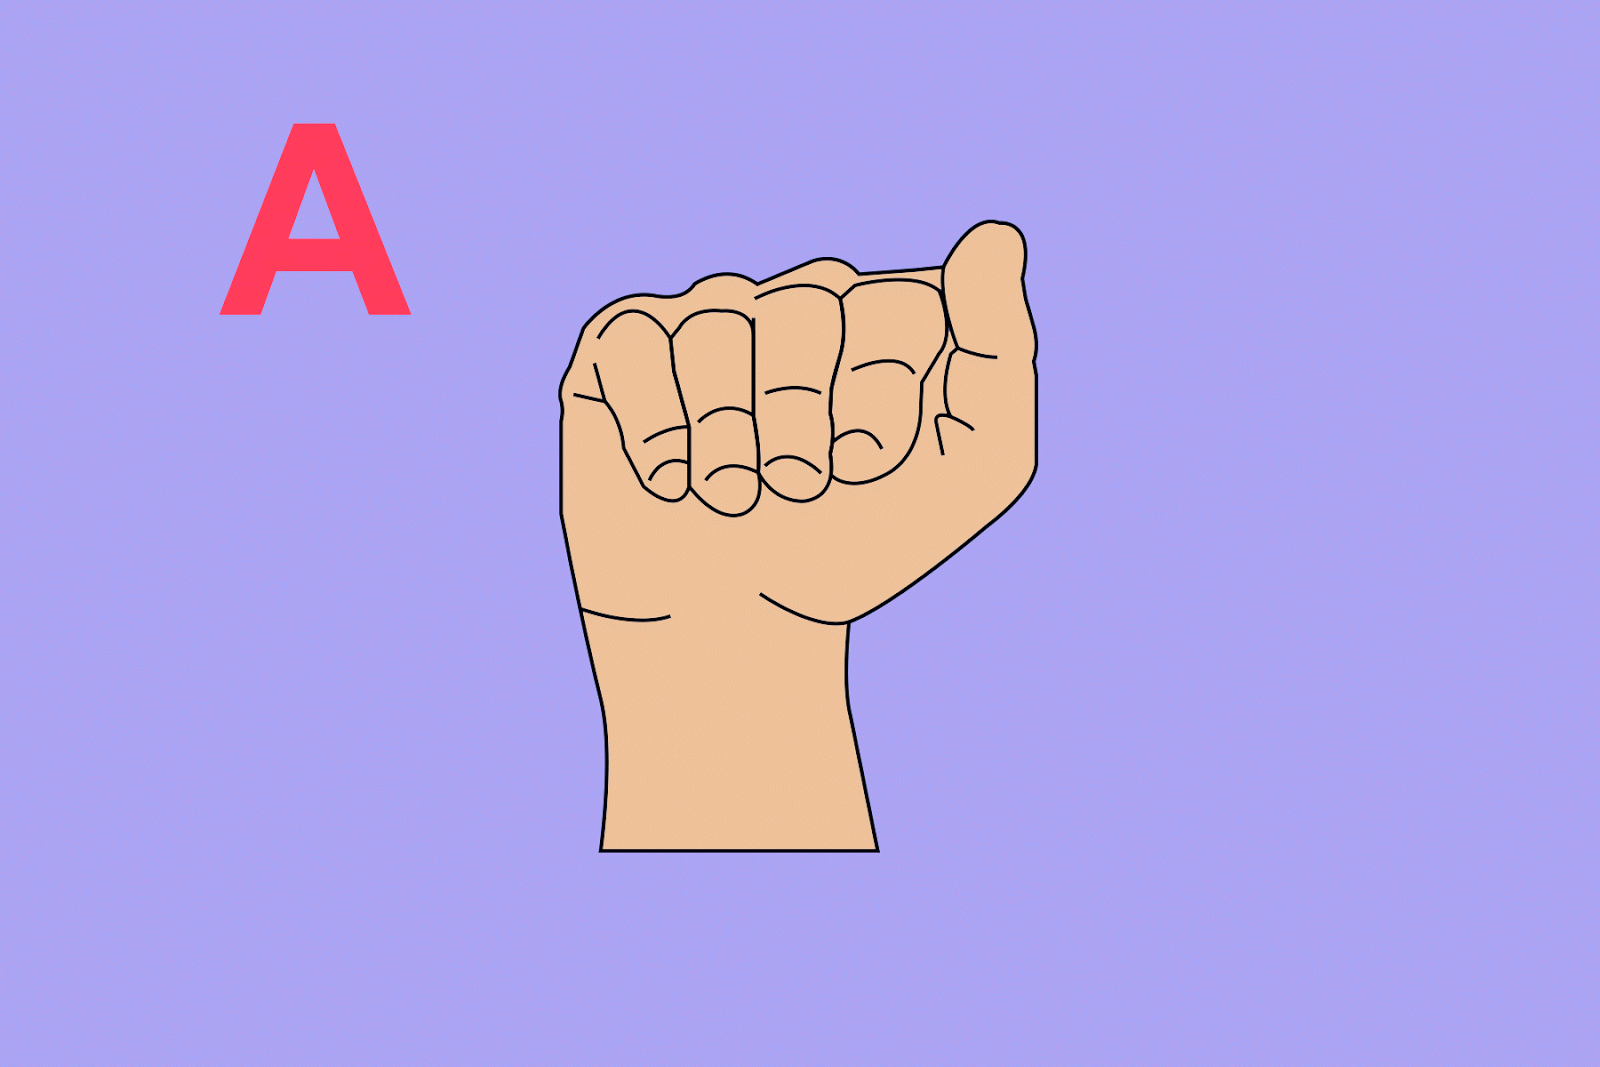

In [2]:
from IPython.display import Image
Image(filename = "SignLanguage.gif", width = 700, height = 500)

### IMPORTING NECESSARY LIBRARIES 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### IMPORTING PACKAGES

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [5]:
train_df=pd.read_csv('sign_mnist_train.csv')
test_df=pd.read_csv('sign_mnist_test.csv')

### IIMPORTING MATPLOTLIB AND SEABORN WITHIN JUPYTER NOTEBOOK

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING AND PREPROCESSING THE DATASET

The dataset-format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

### DESCRIBING THE DATASETS

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [8]:
print('Train dataset has ' , train_df.shape[1] ,' columns and ',train_df.shape[0],' rows')

Train dataset has  785  columns and  27455  rows


In [9]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [11]:
print('Train dataset has ' , test_df.shape[1] ,' columns and ',test_df.shape[0],' rows')

Train dataset has  785  columns and  7172  rows


In [12]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### DATA PREPROCESSING

First step is to convert array into images(tensors)

In [13]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [14]:
unique_labels = y_train.unique()
unique_labels = np.sort(unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

### VISUALIZNG THE DATA

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


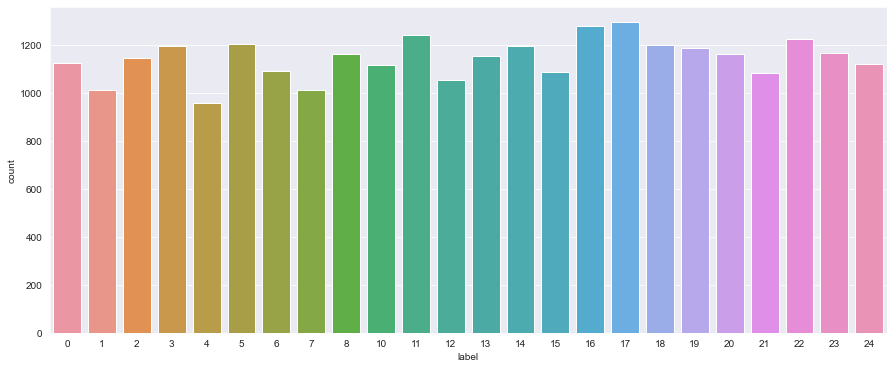

In [15]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid");
sns.countplot(y_train);

This visual tells us that there are nearly 1000 examaples for each class output so we declare this dataset as a balanced dataset

In [16]:
from sklearn.preprocessing import LabelBinarizer

In [17]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

y_train[:2]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

LabelBinarizer performed OHE sort of stuff on our training data.

We are now writing a function which takes our array of images and returns a well shaped wrangled array

As the pixel values lie between 0 and 255, but our model will perform well if we scale pixel values between 0 and 1.

In [18]:
x_train = train_df.values
x_test = test_df.values

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

Now we are writing a function whihc takes image array as input and displays 10 images from the array in processed gray scale

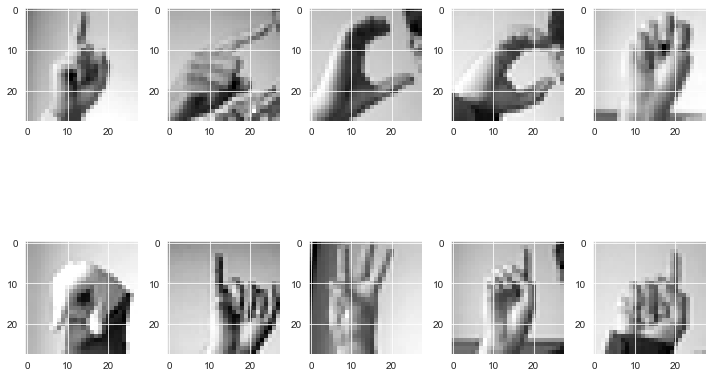

In [21]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

### DATA AUGMENTATION

We expand the dataset artificially to avoid overfitting and data augmentation is done by 

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### USING A CONVOLUTIONAL NEURAL NETWORK TO TRAIN AND RUN TESTS

A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

We will be implementing the neural networr, which is the last part of our project in the final subsmission

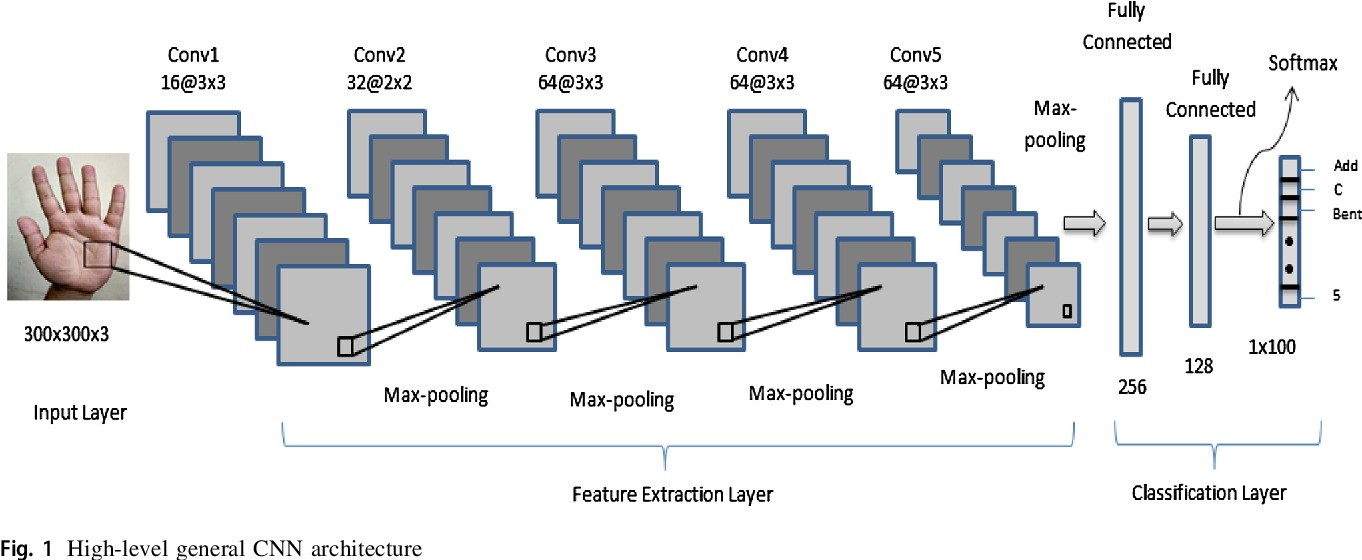

In [23]:
Image(filename = "sig_cnn.jpeg", width = 700, height = 500)

We use the ReduceLROnPlateau module to calculate the value accuracy for the model

In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

We create a 2D Convolutional Neural Network with Sequential model using Conv2D, MaxPool2D and Dense.

In [25]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

We then use Epochs to find out the number of passes of the entire training dataset the machine learning algorithm has completed, we will experiment the model with different number of Epochs to get the maximum accuracy.

In [27]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 57s 262ms/step - loss: 1.1314 - accuracy: 0.6509 - val_loss: 3.7996 - val_accuracy: 0.0852 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 56s 259ms/step - loss: 0.2269 - accuracy: 0.9259 - val_loss: 1.9788 - val_accuracy: 0.3938 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 55s 258ms/step - loss: 0.0994 - accuracy: 0.9683 - val_loss: 0.1689 - val_accuracy: 0.9388 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 56s 259ms/step - loss: 0.0703 - accuracy: 0.9775 - val_loss: 0.0348 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 57s 266ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0384 - val_accuracy: 0.9872 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9878
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [=============================

In [28]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 3s 14ms/step - loss: 0.0013 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


## We observe that our model has an accuracy of 100%

### Analyzing our model for training and testing accuracy

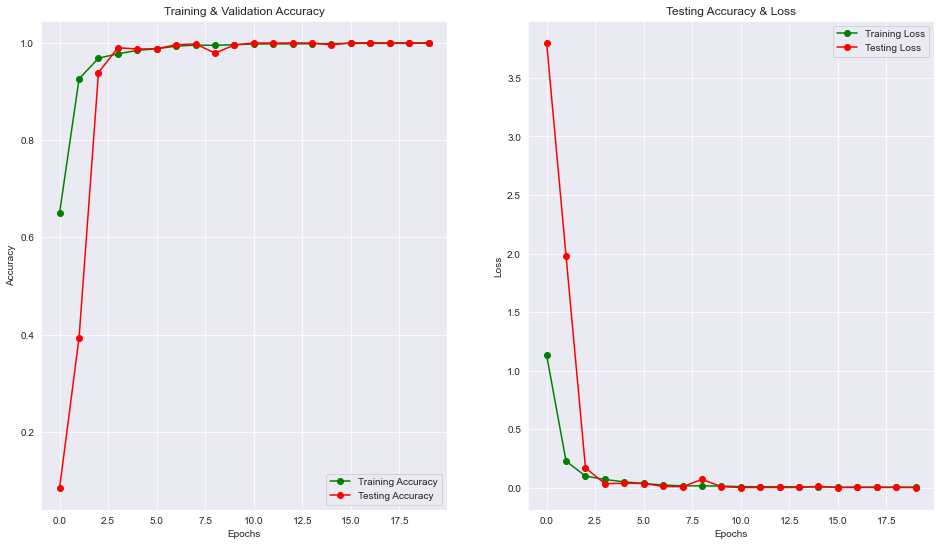

In [32]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()